In [65]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [66]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to /Users/muhammad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/muhammad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/muhammad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/muhammad/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
wine = pd.read_csv('data/wine_cleaned_dataframe.csv')

In [69]:
wine

,country,description,designation,points,price_in_usd,province,region,wine_name,variety,winery,price_category,rating
0,italy,"aromas include tropical fruit, broom, brimston...",vulkà bianco,87,17,sicily & sardinia,etna,nicosia 2013 vulkà bianco (etna),white blend,nicosia,premium,very_good
1,us,"pineapple rind, lemon pith and orange blossom ...",reserve late harvest,87,13,michigan,lake michigan shore,st. julian 2013 reserve late harvest riesling ...,riesling,st. julian,popular_premium,very_good
2,us,"much like the regular bottling from 2012, this...",vintner's reserve wild child block,87,65,oregon,willamette valley,sweet cheeks 2012 vintner's reserve wild child...,pinot noir,sweet cheeks,luxury,very_good
3,spain,blackberry and raspberry aromas show a typical...,ars in vitro,87,15,northern spain,navarra,tandem 2011 ars in vitro tempranillo-merlot (n...,tempranillo-merlot,tandem,popular_premium,very_good
4,italy,"here's a bright, informal red that opens with ...",belsito,87,16,sicily & sardinia,vittoria,terre di giurfo 2013 belsito frappato (vittoria),frappato,terre di giurfo,premium,very_good
...,...,...,...,...,...,...,...,...,...,...,...,...
68534,italy,"blackberry, cassis, grilled herb and toasted a...",sàgana tenuta san giacomo,90,40,sicily & sardinia,sicilia,cusumano 2012 sàgana tenuta san giacomo nero d...,nero d'avola,cusumano,ultra_premium,excellent
68535,france,"initially quite muted, this wine slowly develo...",domaine saint-rémy herrenweg,90,24,alsace,alsace,domaine ehrhart 2013 domaine saint-rémy herren...,gewürztraminer,domaine ehrhart,super_premium,excellent
68536,france,"while it's rich, this beautiful dry wine also ...",seppi landmann vallée noble,90,28,alsace,alsace,domaine rieflé-landmann 2013 seppi landmann va...,pinot gris,domaine rieflé-landmann,super_premium,excellent
68537,france,well-drained gravel soil gives this wine its c...,kritt,90,30,alsace,alsace,domaine gresser 2013 kritt gewurztraminer (als...,gewürztraminer,domaine gresser,super_premium,excellent


In [70]:
## pretrained model that recognizes nouns and adjectives

## pairwise tokenisation

In [71]:
wine.shape

(68539, 12)

In [72]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68539 entries, 0 to 68538
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   country         68539 non-null  object
 1   description     68539 non-null  object
 2   designation     68539 non-null  object
 3   points          68539 non-null  int64 
 4   price_in_usd    68539 non-null  int64 
 5   province        68539 non-null  object
 6   region          68539 non-null  object
 7   wine_name       68539 non-null  object
 8   variety         68539 non-null  object
 9   winery          68539 non-null  object
 10  price_category  68539 non-null  object
 11  rating          68539 non-null  object
dtypes: int64(2), object(10)
memory usage: 6.3+ MB


In [73]:
wine.isna().sum()

country           0
description       0
designation       0
points            0
price_in_usd      0
province          0
region            0
wine_name         0
variety           0
winery            0
price_category    0
rating            0
dtype: int64

In [74]:
wine['length'] = list(map(lambda x: len(str(x).split()), wine['description']))

In [75]:
wine = wine[wine['length'] > 7]

In [76]:
wine.shape

(68535, 13)

In [77]:
wine['price_category'].value_counts()

ultra_premium      18730
super_premium      15028
luxury             12308
premium            10120
popular_premium     7776
super_luxury        2140
value               1965
icon                 468
Name: price_category, dtype: int64

In [78]:
wine['length'].describe()

count    68535.000000
mean        41.344320
std         11.335308
min          8.000000
25%         34.000000
50%         40.000000
75%         48.000000
max        135.000000
Name: length, dtype: float64

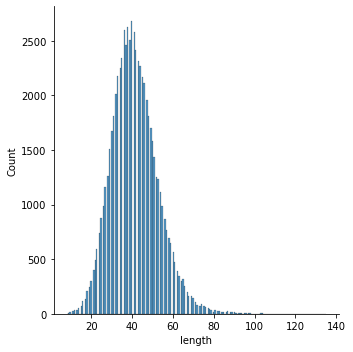

In [52]:
sns.displot(x=wine['length'])

In [53]:
wine ['length'].describe()

count    68535.000000
mean        41.344320
std         11.335308
min          8.000000
25%         34.000000
50%         40.000000
75%         48.000000
max        135.000000
Name: length, dtype: float64

In [64]:
wine ['variety'].value_counts()

pinot noir                  8381
chardonnay                  6468
red blend                   5993
cabernet sauvignon          4583
bordeaux-style red blend    3086
                            ... 
debit                          1
riesling-chardonnay            1
verduzzo friulano              1
treixadura                     1
bobal-cabernet sauvignon       1
Name: variety, Length: 478, dtype: int64

In [125]:
## defines a function that can change any column in the data frame into a list of tokenized sentences 

def tokenizer (df_column):
    
    values = []
    corpus=[]
    for i in df_column:
        values.append(i)
        corpus.append(nltk.sent_tokenize(i))
    
    corpus=[sent for sublist in corpus for sent in sublist]
    
    for i in range(len(corpus)):
        corpus[i] = corpus[i].lower()
        corpus[i] = re.sub(r'\W+',' ',corpus[i]) # Replace everything non-alpahnumeric by ' '
        corpus[i] = re.sub(r'\s+',' ',corpus[i]) # Replace one or more whitespaces by  ' '
        corpus[i] = re.sub(r'\d+',' ',corpus[i]) # Replace one or more digits by  
        corpus[i] = BeautifulSoup(corpus[i], 'html.parser').get_text().strip()
        
        
    
    return corpus
    

    
    
    
    
    

In [ ]:
def stripper 

In [126]:
tokenizer(wine['description'])

['aromas include tropical fruit broom brimstone and dried herb',
 'the palate isn t overly expressive offering unripened apple citrus and dried sage alongside brisk acidity',
 'pineapple rind lemon pith and orange blossom start off the aromas',
 'the palate is a bit more opulent with notes of honey drizzled guava and mango giving way to a slightly astringent semidry finish',
 'much like the regular bottling from   this comes across as rather rough and tannic with rustic earthy herbal characteristics',
 'nonetheless if you think of it as a pleasantly unfussy country wine it s a good companion to a hearty winter stew',
 'blackberry and raspberry aromas show a typical navarran whiff of green herbs and in this case horseradish',
 'in the mouth this is fairly full bodied with tomatoey acidity',
 'spicy herbal flavors complement dark plum fruit while the finish is fresh but grabby',
 'here s a bright informal red that opens with aromas of candied berry white pepper and savory herb that carry

In [124]:
tokenizer(wine['variety'])

['white blend',
 'riesling',
 'pinot noir',
 'tempranillo merlot',
 'frappato',
 'pinot gris',
 'cabernet sauvignon',
 'malbec',
 'malbec',
 'tempranillo blend',
 'red blend',
 'white blend',
 'merlot',
 'nero d avola',
 'pinot noir',
 'white blend',
 'red blend',
 'gamay',
 'red blend',
 'white blend',
 'red blend',
 'pinot noir',
 'cabernet sauvignon',
 'primitivo',
 'nero d avola',
 'gamay',
 'red blend',
 'inzolia',
 'gamay',
 'red blend',
 'monica',
 'bordeaux style white blend',
 'red blend',
 'chardonnay',
 'grillo',
 'cabernet sauvignon',
 'sangiovese',
 'cabernet franc',
 'champagne blend',
 'sauvignon blanc',
 'bordeaux style red blend',
 'champagne blend',
 'cabernet sauvignon',
 'aglianico',
 'cabernet sauvignon',
 'petite sirah',
 'bordeaux style red blend',
 'chardonnay',
 'pinot noir',
 'petit manseng',
 'rosé',
 'zinfandel',
 'merlot',
 'vernaccia',
 'red blend',
 'meritage',
 'viognier',
 'riesling',
 'sangiovese',
 'bordeaux style red blend',
 'riesling',
 'riesling',

In [58]:
descriptions = []
corpus=[]
for description in wine['description']:
    descriptions.append(description)
    corpus.append(nltk.sent_tokenize(description))

In [59]:
corpus

[['aromas include tropical fruit, broom, brimstone and dried herb.',
  "the palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."],
 ['pineapple rind, lemon pith and orange blossom start off the aromas.',
  'the palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.'],
 ['much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics.',
  "nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew."],
 ['blackberry and raspberry aromas show a typical navarran whiff of green herbs and, in this case, horseradish.',
  'in the mouth, this is fairly full bodied, with tomatoey acidity.',
  'spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.'],
 ["here's a bright, informal red that opens with aromas of candied

In [60]:
corpus=[sent for sublist in corpus for sent in sublist]

##for sublist in corpus
 ##   for sententce in sublit 
    ##    corpus1.append(sentence)

In [61]:
len (corpus)

187361

In [62]:
corpus

['aromas include tropical fruit, broom, brimstone and dried herb.',
 "the palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",
 'pineapple rind, lemon pith and orange blossom start off the aromas.',
 'the palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.',
 'much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics.',
 "nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",
 'blackberry and raspberry aromas show a typical navarran whiff of green herbs and, in this case, horseradish.',
 'in the mouth, this is fairly full bodied, with tomatoey acidity.',
 'spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.',
 "here's a bright, informal red that opens with aromas of candied berry, white 

In [63]:
for i in range(len(corpus)):
    ##corpus[i] = corpus[i].lower()
    corpus[i] = re.sub(r'\W+',' ',corpus[i]) # Replace everything non-alpahnumeric by ' '
    corpus[i] = re.sub(r'\s+',' ',corpus[i]) # Replace one or more whitespaces by  ' '
    corpus[i] = re.sub(r'\d+',' ',corpus[i]) # Replace one or more digits by  ' '
    ## corpus[i] = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)'," ", corpus[i]) # Replace e-mails by ' '
    # Replace urls by ''
    ##corpus[i] = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', ' ' , corpus[i]) 
    # Replace html tags by ''
    corpus[i] = BeautifulSoup(corpus[i], 'html.parser').get_text().strip()

In [ ]:
## create a list that removes all grape varieties from the description

In [79]:
print(len(corpus)) 

187361


In [81]:
print(corpus[19])

this has a juicy feel that thickens over time with oak character and extract becoming more apparent


In [92]:
wordfreq = {}
for sentence in corpus:
    # words = sentence.split()
    words = nltk.word_tokenize(sentence)
    for word in words:
        if ( word not in wordfreq.keys() ): ## first time appearnce in the sentence
            wordfreq[word] = 1 # We initialize the corresponding counter
        else: ## if the world is already existed in the dictionalry 
            wordfreq[word] += 1 # We increase the corresponding counter

In [93]:
len(list(wordfreq.keys()))

24617

In [94]:
wordfreq

{'aromas': 22007,
 'include': 375,
 'tropical': 1721,
 'fruit': 26297,
 'broom': 126,
 'brimstone': 37,
 'and': 188337,
 'dried': 4945,
 'herb': 3832,
 'the': 119649,
 'palate': 20477,
 'isn': 366,
 't': 2202,
 'overly': 276,
 'expressive': 364,
 'offering': 1451,
 'unripened': 3,
 'apple': 6979,
 'citrus': 5582,
 'sage': 1101,
 'alongside': 3281,
 'brisk': 1048,
 'acidity': 17248,
 'pineapple': 1781,
 'rind': 466,
 'lemon': 4561,
 'pith': 348,
 'orange': 3070,
 'blossom': 790,
 'start': 341,
 'off': 1984,
 'is': 50020,
 'a': 95805,
 'bit': 3201,
 'more': 5594,
 'opulent': 729,
 'with': 64023,
 'notes': 9713,
 'of': 94150,
 'honey': 2257,
 'drizzled': 38,
 'guava': 191,
 'mango': 563,
 'giving': 985,
 'way': 1404,
 'to': 29656,
 'slightly': 2578,
 'astringent': 828,
 'semidry': 35,
 'finish': 17917,
 'much': 1536,
 'like': 4512,
 'regular': 208,
 'bottling': 2377,
 'from': 17785,
 'this': 60590,
 'comes': 1697,
 'across': 629,
 'as': 9685,
 'rather': 1260,
 'rough': 403,
 'tannic': 343

In [95]:
 sorted(wordfreq.items(), key=lambda item: item[1], reverse = True)

[('and', 188337),
 ('the', 119649),
 ('a', 95805),
 ('of', 94150),
 ('with', 64023),
 ('this', 60590),
 ('is', 50020),
 ('it', 46480),
 ('wine', 40980),
 ('in', 35145),
 ('flavors', 32607),
 ('to', 29656),
 ('s', 29213),
 ('fruit', 26297),
 ('on', 24106),
 ('aromas', 22007),
 ('that', 21385),
 ('palate', 20477),
 ('finish', 17917),
 ('from', 17785),
 ('acidity', 17248),
 ('cherry', 16574),
 ('but', 16340),
 ('tannins', 15848),
 ('black', 15705),
 ('drink', 15107),
 ('ripe', 13838),
 ('are', 13579),
 ('has', 12137),
 ('red', 11503),
 ('for', 11346),
 ('oak', 10616),
 ('by', 10600),
 ('spice', 10457),
 ('notes', 9713),
 ('as', 9685),
 ('an', 9667),
 ('rich', 9366),
 ('its', 9360),
 ('dry', 8991),
 ('berry', 8827),
 ('now', 8673),
 ('full', 8645),
 ('nose', 8641),
 ('fresh', 8319),
 ('blend', 8269),
 ('plum', 7757),
 ('blackberry', 7361),
 ('offers', 7164),
 ('sweet', 7043),
 ('apple', 6979),
 ('well', 6907),
 ('soft', 6832),
 ('dark', 6805),
 ('cabernet', 6671),
 ('white', 6649),
 ('show

In [105]:
from nltk.corpus import stopwords

stop_words = list(stopwords.words('english'))


In [111]:
for i in range(len(stop_words)):
    stop_words[i] = re.sub(r"\s*'\s*\w*","",stop_words[i]) ## why does this use 

#stop_words = [word for word in list(np.unique(stop_words)) if len(word) > 1]
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'you',
 'you',
 'you',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more'

In [112]:
 sorted(wordfreq.items(), key=lambda item: item[1], reverse = True)

[('and', 188337),
 ('the', 119649),
 ('a', 95805),
 ('of', 94150),
 ('with', 64023),
 ('this', 60590),
 ('is', 50020),
 ('it', 46480),
 ('wine', 40980),
 ('in', 35145),
 ('flavors', 32607),
 ('to', 29656),
 ('s', 29213),
 ('fruit', 26297),
 ('on', 24106),
 ('aromas', 22007),
 ('that', 21385),
 ('palate', 20477),
 ('finish', 17917),
 ('from', 17785),
 ('acidity', 17248),
 ('cherry', 16574),
 ('but', 16340),
 ('tannins', 15848),
 ('black', 15705),
 ('drink', 15107),
 ('ripe', 13838),
 ('are', 13579),
 ('has', 12137),
 ('red', 11503),
 ('for', 11346),
 ('oak', 10616),
 ('by', 10600),
 ('spice', 10457),
 ('notes', 9713),
 ('as', 9685),
 ('an', 9667),
 ('rich', 9366),
 ('its', 9360),
 ('dry', 8991),
 ('berry', 8827),
 ('now', 8673),
 ('full', 8645),
 ('nose', 8641),
 ('fresh', 8319),
 ('blend', 8269),
 ('plum', 7757),
 ('blackberry', 7361),
 ('offers', 7164),
 ('sweet', 7043),
 ('apple', 6979),
 ('well', 6907),
 ('soft', 6832),
 ('dark', 6805),
 ('cabernet', 6671),
 ('white', 6649),
 ('show

In [113]:
corpus = [(wordfreq[key],key) for key in list(wordfreq.keys()) if key not in stop_words] 

In [115]:
corpus

[(22007, 'aromas'),
 (375, 'include'),
 (1721, 'tropical'),
 (26297, 'fruit'),
 (126, 'broom'),
 (37, 'brimstone'),
 (4945, 'dried'),
 (3832, 'herb'),
 (20477, 'palate'),
 (276, 'overly'),
 (364, 'expressive'),
 (1451, 'offering'),
 (3, 'unripened'),
 (6979, 'apple'),
 (5582, 'citrus'),
 (1101, 'sage'),
 (3281, 'alongside'),
 (1048, 'brisk'),
 (17248, 'acidity'),
 (1781, 'pineapple'),
 (466, 'rind'),
 (4561, 'lemon'),
 (348, 'pith'),
 (3070, 'orange'),
 (790, 'blossom'),
 (341, 'start'),
 (3201, 'bit'),
 (729, 'opulent'),
 (9713, 'notes'),
 (2257, 'honey'),
 (38, 'drizzled'),
 (191, 'guava'),
 (563, 'mango'),
 (985, 'giving'),
 (1404, 'way'),
 (2578, 'slightly'),
 (828, 'astringent'),
 (35, 'semidry'),
 (17917, 'finish'),
 (1536, 'much'),
 (4512, 'like'),
 (208, 'regular'),
 (2377, 'bottling'),
 (1697, 'comes'),
 (629, 'across'),
 (1260, 'rather'),
 (403, 'rough'),
 (3432, 'tannic'),
 (729, 'rustic'),
 (2866, 'earthy'),
 (2664, 'herbal'),
 (264, 'characteristics'),
 (146, 'nonetheless'

In [118]:
 sorted(corpus, key=lambda item: item[0], reverse = True)

[(40980, 'wine'),
 (32607, 'flavors'),
 (26297, 'fruit'),
 (22007, 'aromas'),
 (20477, 'palate'),
 (17917, 'finish'),
 (17248, 'acidity'),
 (16574, 'cherry'),
 (15848, 'tannins'),
 (15705, 'black'),
 (15107, 'drink'),
 (13838, 'ripe'),
 (11503, 'red'),
 (10616, 'oak'),
 (10457, 'spice'),
 (9713, 'notes'),
 (9366, 'rich'),
 (8991, 'dry'),
 (8827, 'berry'),
 (8645, 'full'),
 (8641, 'nose'),
 (8319, 'fresh'),
 (8269, 'blend'),
 (7757, 'plum'),
 (7361, 'blackberry'),
 (7164, 'offers'),
 (7043, 'sweet'),
 (6979, 'apple'),
 (6907, 'well'),
 (6832, 'soft'),
 (6805, 'dark'),
 (6671, 'cabernet'),
 (6649, 'white'),
 (6616, 'shows'),
 (6470, 'vanilla'),
 (6434, 'texture'),
 (6430, 'crisp'),
 (6253, 'bodied'),
 (6190, 'light'),
 (6110, 'fruits'),
 (5685, 'bright'),
 (5630, 'raspberry'),
 (5582, 'citrus'),
 (5565, 'pepper'),
 (5222, 'chocolate'),
 (4945, 'dried'),
 (4762, 'good'),
 (4728, 'firm'),
 (4577, 'sauvignon'),
 (4561, 'lemon'),
 (4551, 'juicy'),
 (4543, 'vineyard'),
 (4530, 'years'),
 (451

In [ ]:
## pairwise tokenization
## dropping words mentioned in other columns; variety, country
## remove verbs using NLTK

In [ ]:
wine['']